In [1]:
import librosa
import numpy as np

## Import of the data
### raw data


In [3]:
audio_file="/content/file_example_WAV_2MG.wav"
samples, sample_rate = librosa.load(audio_file, sr=None)

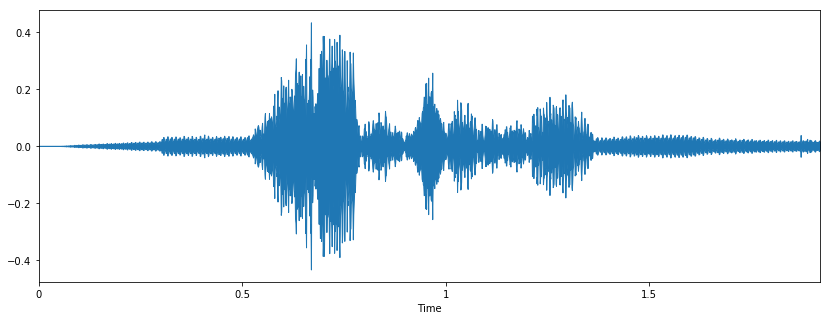

In [5]:
import librosa.display
import matplotlib.pyplot as plt

# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

Each second has 16000(depends on the sample rate) sample numbers. the total sample equals to the sample rate*lenghth(seconds) of the audio

In [6]:

print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (92160,) Sample rate  48000 Data type <class 'numpy.ndarray'>
[0.03384399 0.03393555 0.03414917 0.03427124 0.03442383 0.03457642
 0.0345459  0.03442383 0.03430176 0.03411865 0.03408813 0.03433228
 0.03445435 0.03439331 0.03436279 0.03430176 0.03396606 0.03375244
 0.03378296 0.03375244]


## Convert to Spectrograms

/home/bernoulli/.local/lib/python3.8/site-packages/librosa/display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


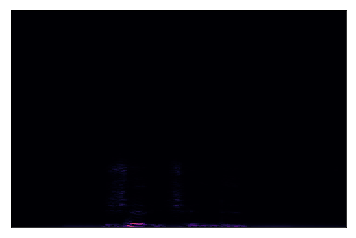

In [7]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

Unfortunately, when we display this spectrogram there isn’t much information for us to see.
This happens because of the way humans perceive sound.
We hear them on a logarithmic scale rather than a linear scale. 

## Mel Spectrograms

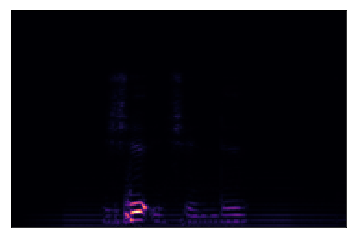

In [8]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

This is better than before, but most of the spectrogram is still dark and not carrying enough useful information. So let’s modify it to use the Decibel Scale instead of Amplitude.

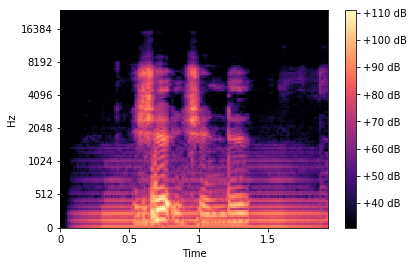

In [9]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

## Fine tune the mel spectrogram

In [10]:
#Spectrogram is a 2D numpy array
print(type(mel_sgram), mel_sgram.shape)

<class 'numpy.ndarray'> (128, 181)


### MFCC (for Human Speech)

These essentially take Mel Spectrograms and apply a couple of further processing steps. This selects a compressed representation of the frequency bands from the Mel Spectrogram that correspond to the most common frequencies at which humans speak.

/home/bernoulli/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/bernoulli/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


MFCC is of type <class 'numpy.ndarray'> with shape (20, 181)


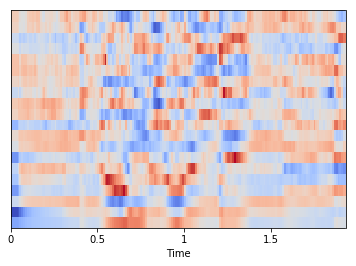

In [11]:
import sklearn
import librosa
import librosa.display

# Load the audio file
samples, sample_rate = librosa.load(audio_file, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')

## Data augmentation

# Date preprocession method 2 with tensorflow

## import package

# New Section

Aaugment the number of the dataset of the spectrogram (get more input data)

In [12]:
!pip3 install SpecAugment

You should consider upgrading via the '/home/bernoulli/anaconda3/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install tensorflow-io

You should consider upgrading via the '/home/bernoulli/anaconda3/bin/python -m pip install --upgrade pip' command.


In [14]:
!pip install pydub

You should consider upgrading via the '/home/bernoulli/anaconda3/bin/python -m pip install --upgrade pip' command.


In [15]:
from pydub import AudioSegment
  
# Open the stereo audio file as
# an AudioSegment instance
stereo_audio = AudioSegment.from_file(
    "/content/file_example_WAV_2MG.wav",
    format="wav")
  
# Calling the split_to_mono method
# on the stereo audio file
mono_audios = stereo_audio.split_to_mono()

# Exporting/Saving the two mono
# audio files present at index 0(left)
# and index 1(right) of list returned
# by split_to_mono method
mono_left = mono_audios[0].export(
    "/content/mono_left.wav",
    format="wav")
mono_right = mono_audios[1].export(
    "/content/mono_right.wav",
    format="wav")

/home/bernoulli/anaconda3/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [16]:
import tensorflow as tf
import tensorflow_io as tfio

In [17]:
audio = tfio.audio.AudioIOTensor('/content/file_example_WAV_2MG.wav')
print(audio)

<AudioIOTensor: shape=[92160     2], dtype=<dtype: 'int16'>, rate=48000>


## I replace the fonction tf.squeeze by a slicing technique 

In [55]:
audio_slice = audio[100:]

# remove last dimension
# this is the code before change "audio_tensor = tf.squeeze(audio_slice, axis=-1)"

#the code after is :
audio_tensor = audio_slice[:,0]

print(audio_tensor)

tf.Tensor([   0    0    0 ... -418 -433 -408], shape=(92060,), dtype=int16)


In [56]:
#just reshape the tensor numpy ndarray

audio_tensor = tf.reshape(audio_tensor,(audio_tensor.shape[0],1))

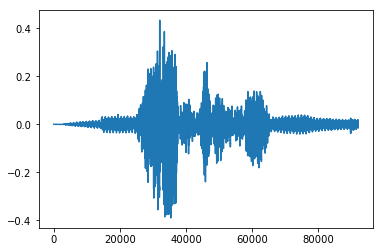

In [57]:
import matplotlib.pyplot as plt


tensor = tf.cast(audio_tensor, tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())

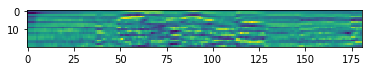

In [58]:
# Freq masking
freq_mask = tfio.audio.freq_mask(mfcc, param=1)

plt.figure()
plt.imshow(freq_mask.numpy())

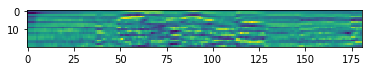

In [59]:
# Time masking
time_mask = tfio.audio.time_mask(mfcc, param=20)

plt.figure()
plt.imshow(time_mask.numpy())